# NLP Chat Analysis Project


## Introduction

This project is based on data provided by **Codecademy** that contains the content of a number of SMS messages. The project will utilise techniques from the Natural Language Processing Specialist module to analyse the data.

## Importing Libraries and Dataset

Firstly, importing the libraries and data that will be needed for the project, then using the pandas library to load in the data as a DataFrame.

In [28]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re

In [3]:
# Import the SMS data as a pandas DataFrame
df = pd.read_csv('clean_nus_sms.csv', index_col=0)

Getting an initial feel for the DataFrame with the .head() and info.() methods.

In [6]:
df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48598 entries, 0 to 55834
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48598 non-null  int64 
 1   Message  48595 non-null  object
 2   length   48598 non-null  object
 3   country  48598 non-null  object
 4   Date     48598 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


There are 48,598 messages recorded in the DataFrame that we can use for analysis, with no null values to deal with.

## Analysis


For this project, we can analyse the content of the message in order categorise them based on whether their sentiment is positive or negative. 

We will do this by doing the following processes:

* Text preprocessing using regex and NLTK.
* Exploratory data analysis with pandas and seaborn.
* Sentiment analysis using bag-of-words and a Naive Bayes classifier.


## Text Preprocessing

For the text preprocessing, we need to remove unnecessary characters and words and standardize the casing.

### Remove empty messages

Before starting, remove any rows without a message using the `.dropna()` method.

In [21]:
df = df.dropna()
len(df)

48595

3 empty messages were found and removed.

### Lower case message data

The next step in our preprocessing is to set all of the characters to lower case by chaining the `.str()` method to convert the pandas Series so that the `.lower()` method can be applied to lower case each string in the column.

In [9]:
df["Message_lower"] = df["Message"].str.lower()

df.head()

,id,Message,length,country,Date,message_lower,Message_lower
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...,meet after lunch la...


### Remove punctuation

Now that all of the characters are in lower case, I will use the same approach for removing punctuation. I will chain the `.str()` method with the `.replace()` method to remove any punctuation.

In [12]:

df["Message_clean"] = df["Message_lower"].str.replace(r'[^\w\s]','')
# View changes
df.head()

,id,Message,length,country,Date,message_lower,Message_lower,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...,bugis oso near wat...,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...,meet after lunch la...,meet after lunch la...


### Remove stopwords

A lot of the time it is worth removing stopwords from text before analysis. However, in this case it might affect our results when we try sentiment analysis. Let's take a look at the stopwords in NLTK to determine if it would be best to remove them.

In [14]:
import nltk
nltk.download('stopwords')

# View stopwords in english
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

### Remove URLs

URLs will not be relevent for this analysis, so let's remove them.

In [19]:
# Create a function to remove url from Message data
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [22]:

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_urls(text))

df.head()

,id,Message,length,country,Date,message_lower,Message_lower,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...,bugis oso near wat...,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...,meet after lunch la...,meet after lunch la...


### Remove HTMLs

We can remove any HTMLs in a similar fashion:

In [23]:

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [24]:

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_html(text))
# View changes
df.head()

,id,Message,length,country,Date,message_lower,Message_lower,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...,bugis oso near wat...,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...,meet after lunch la...,meet after lunch la...


### Tokenize messages

Before commencing sentiment analysis, we need to tokenize the messages. We can use the ntlk toolkit to do this.

In [27]:

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)
df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,id,Message,length,country,Date,message_lower,Message_lower,Message_clean,Message_tokenized
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...,bugis oso near wat...,bugis oso near wat...,"[bugis, oso, near, wat, ...]"
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...,"[i, dunno, until, when, ..., lets, go, learn, ..."
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......,"[den, only, weekdays, got, special, price, ......"
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...,meet after lunch la...,meet after lunch la...,"[meet, after, lunch, la, ...]"


## Sentiment Analysis

The data is processed and ready for analysis.

### Exploratory Data Analysis

Firstly, we can do some preliminary Exploratory Data Analysis to get a feel for the data and create a few quick visualisations.

Starting with the `country` category to get an idea of how many countries there are in the DataFrame using the `.nunique()` method.

In [29]:

df['country'].nunique()

40

Let's see how many messages were sent from each country using the `.value_counts()` method. 

In [30]:

df['country'].value_counts()

country
Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Turkey                    10
Trinidad and Tobago       10
Lebanon                   10
Slovenia                  10
Nigeria                   10
New Zealand               10
Macedonia                 10
UK                        10
Morocco                    9
Romania                    9
Austra

The values in the `country` column could use a little work, as there are some codes representing countries. The `.replace()` method can be used to clean it up.


In [31]:

df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})


In [32]:

df['country'].value_counts()

country
Singapore              31817
India                   7085
United States           5680
Sri Lanka               1047
Malaysia                 767
Pakistan                 751
Unknown                  602
Canada                   198
Bangladesh               126
China                    107
Philippines               67
Indonesia                 48
United Kingdom            40
Nepal                     39
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Trinidad and Tobago       10
Lebanon                   10
Turkey                    10
Nigeria                   10
New Zealand               10
Slovenia                  10
Macedonia                 10
Morocco                    9
Australia                  9
Romania                    9
Jamaica                    8
Barbados                   8
Spain                      5
France                     5
Name: count, dtype: int64

Let's take a look a plot of the top 10 countries.

<Axes: ylabel='country'>

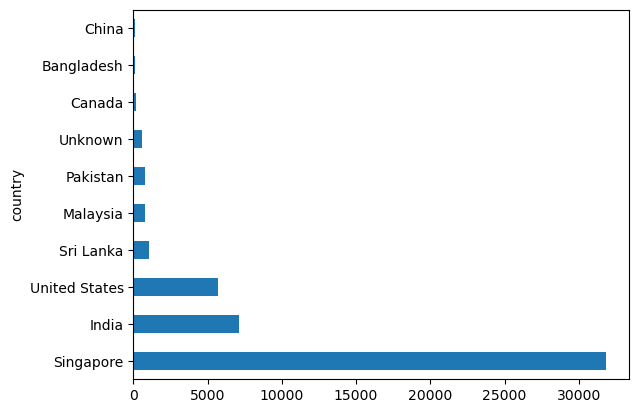

In [37]:

country_value_counts = df['country'].value_counts() 


top_10_country_value_counts = country_value_counts.head(10) 


top_10_country_value_counts.plot.barh() 

Here I can glean that users from Singapore, India, and the United States sent the majority of messages. 

### Sentiment Analysis

Now that we have carried out some EDA, we can finally begin sentiment analysis. We are going to categorise a message into one of two categories - Positive or Negative.

I will use Naive Bayes classification to determining the sentiment of the messages in the `Message` variable. There are a few different options for a corpus that we could choose to create our classifierm including IMDb movie ratings and a collection of sentences called 'subjectivity'. However, the `twitter_samples` corpus will likely be the best fit here as they are the most similar in content to our SMS messages.


In [38]:

nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

Now that the data is downloaded, we can import it from `nltk.corpus`.

In [39]:

from nltk.corpus import twitter_samples

Seperating the tweets into two variables, labeled as positive and negative, in order to create a training set that can be fed into the classifier.

In [40]:

positive_tweets = twitter_samples.strings('positive_tweets.json')

negative_tweets = twitter_samples.strings('negative_tweets.json')

Getting a quick insight into the tweets :

In [41]:

print(positive_tweets[0])

print('There are {} positive tweets.'.format(len(positive_tweets)))

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
There are 5000 positive tweets.


In [43]:

print(negative_tweets[0])

print('There are {} negative tweets.'.format(len(negative_tweets)))

hopeless for tmr :(
There are 5000 negative tweets.


The number of positive to negative samples used to assemble the training set is evenly distributed. we now need to tokenize the tweets.

In [44]:

pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

print(pos_tweet_tokens[0])


neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

print(neg_tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


We can remove the HTML and URLs from the tweets in the same way as we did earlier with the SMS messages.

In [45]:

positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []


for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        
        url_cleaned = remove_urls(token)
         
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    
    positive_cleaned_tweets_list.append(cleaned_tweet)


for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        
        url_cleaned = remove_urls(token)
         
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    
    negative_cleaned_tweets_list.append(cleaned_tweet)


print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

To select the features for the classifier, we can select the most common words in the corpus assuming that these words are the best indicators if something is positive or negative. We can use a frequency distribution to select them.

In [47]:

list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list


all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]


len(all_tweet_tokens)

130052

In [48]:

all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)


print(len(all_tokens))
print(all_tokens.most_common(10))


sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]


sentiment_features[:5]

22690
[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


[':(', ':)', '!', 'I', '.']

We can now create a feature extractor that identifies when a feature is present in a message.

In [49]:
def document_features(document, sentiment_features):
    #make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    #for all my features, check if that feature is in my target message
    for token in sentiment_features:
        #make a dictionary for each message 
        features[token] = (token in document_tokens)
    return features

#test it on a sample sentence
test_sentence = "coding is fun with codecademy :)".split(" ")


We now need to create training and testing sets, and label them accordingly. 70% of the tweets will be used for the training set, and 30% for the testing set.

In [50]:

import random


positive_tw = [(tweet, "Positive") for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, "Negative") for tweet in negative_cleaned_tweets_list]


all_labeled_tweets = positive_tw + negative_tw


random.seed(42)

random.shuffle(all_labeled_tweets)


feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]

train_set, test_set = feature_set[:7000], feature_set[7000:]

We can use the `NaiveBayesClassifier` model with the training and testing sets to build the sentiment model. We will use the `classify()` function to test the performance of the model on the training set. 


In [51]:

from nltk import classify
from nltk import NaiveBayesClassifier


classifier = nltk.NaiveBayesClassifier.train(train_set)


print("Accuracy is:", classify.accuracy(classifier, test_set))


print(classifier.show_most_informative_features(20))

Accuracy is: 0.9963333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True           

We can now use the model to classify the sentiment of the messages. Let's try it out on just one before applying it to the whole corpus.

In [52]:

sample_message = str(df["Message_tokenized"][49])
print(sample_message)


print(classifier.classify(dict([token, True] for token in sample_message)))

['yup', '...', 'hey', 'then', 'one', 'day', 'on', 'fri', 'we', 'can', 'ask', 'miwa', 'and', 'jiayin', 'take', 'leave', 'go', 'karaoke']
Negative


The sentiment of the 50th message (`"yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke"`) is Negative per the model. 

Now let's evaluate all the messages in the NUS SMS Corpus.

In [53]:

sentiments = []


for message in df['Message_tokenized']:
    sentiments.append(str((classifier.classify(dict([token, True] for token in message)))))


df['Sentiment'] = sentiments

df['Sentiment'].value_counts()

Sentiment
Negative    28481
Positive    20114
Name: count, dtype: int64

We want to know what portion of the data is Positive/Negative. Let's use the `.value_counts()` method and set `normalize = True` so we get a proportion instead of raw counts.

In [55]:

df['Sentiment'].value_counts(normalize = True)

Sentiment
Negative    0.586089
Positive    0.413911
Name: proportion, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_19336\2961166121.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='RdBu')


<Axes: xlabel='Sentiment', ylabel='count'>

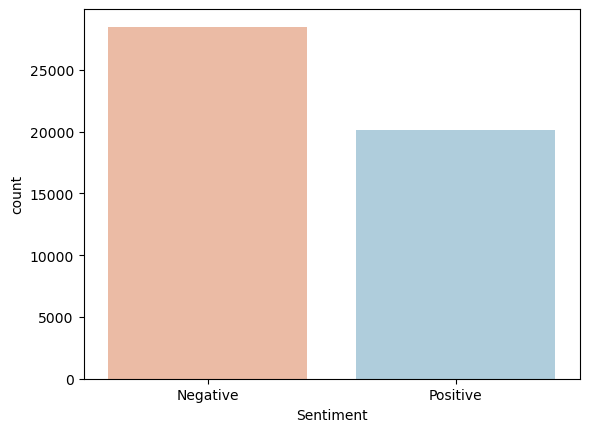

In [58]:
sns.countplot(x='Sentiment', data=df, palette='RdBu')

The model predicts that 64.3% of the messages in the NUS SMS Corpus are Negative.

Now we can to compare sentiment by country. To make this easier, let's transform sentiment into a numeric variable. Reassigning Positive messages '1' and Negative messages '-1'. 


In [61]:

def convert_sentiment(sentiment):
    """
    Takes in sentiments, and converts them to binary values.
    """
    if sentiment == 'Positive':
        return 1
    else:
        return -1


df['Sentiment_score'] = df['Sentiment'].apply(convert_sentiment)


df.head()

,id,Message,length,country,Date,message_lower,Message_lower,Message_clean,Message_tokenized,Sentiment,Sentiment_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat...,bugis oso near wat...,bugis oso near wat...,"[bugis, oso, near, wat, ...]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,"go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...",Negative,-1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...,i dunno until when... lets go learn pilates...,"[i, dunno, until, when, ..., lets, go, learn, ...",Negative,-1
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......,den only weekdays got special price... haiz......,"[den, only, weekdays, got, special, price, ......",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la...,meet after lunch la...,meet after lunch la...,"[meet, after, lunch, la, ...]",Negative,-1


Now group by country and use the `.mean()` method to get the average sentiment score for each country.

In [64]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_sent = df.groupby(['country'])[numeric_cols].mean()

# Reset the index
df_sent.reset_index(inplace=True)

df_sent.head()

,country,id,Sentiment_score
0,Australia,45574.666667,0.333333
1,Bangladesh,39876.301587,-0.031746
2,Barbados,45633.500000,-1.000000
3,Canada,5763.035354,-0.161616
4,China,12499.878505,0.028037


We can find out which country sends the most positive messages, using the `.sort_values()` method.

In [65]:

df_sent.sort_values(by='Sentiment_score') 

,country,id,Sentiment_score
2,Barbados,45633.500000,-1.000000
13,Lebanon,41975.500000,-0.600000
19,Nigeria,41682.500000,-0.600000
29,Turkey,45643.500000,-0.600000
22,Romania,41232.000000,-0.555556
11,Jamaica,45285.250000,-0.500000
10,Italia,45593.500000,-0.400000
24,Singapore,23200.872835,-0.263287
25,Slovenia,41282.500000,-0.200000
14,Macedonia,28552.500000,-0.200000


Now we can plot the sentiment by country to see which countries are the most Positive/Negative.

<Axes: xlabel='country', ylabel='Sentiment_score'>

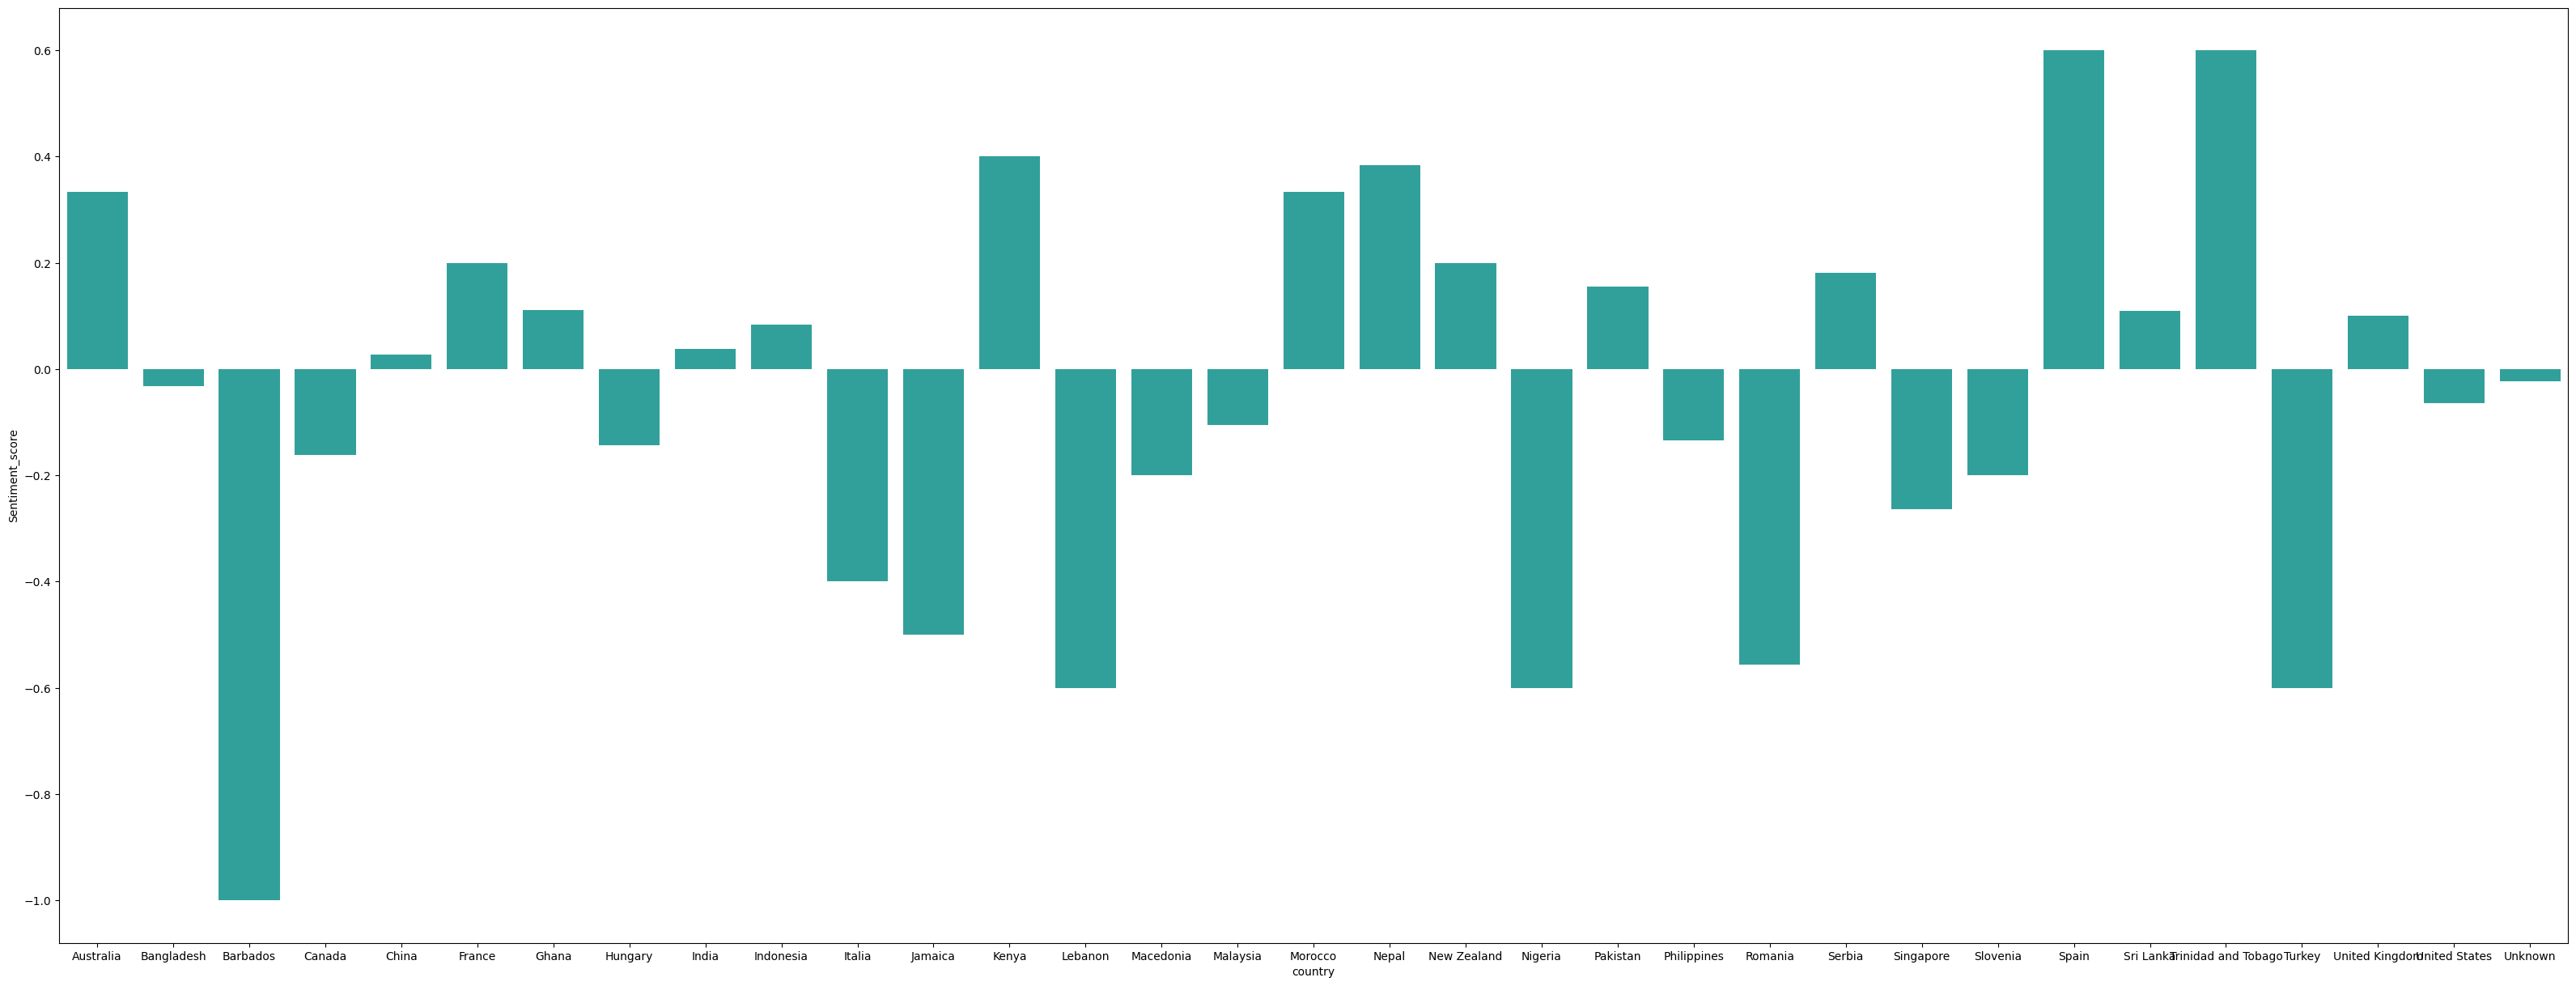

In [66]:
# Plot general sentiments
fig, ax = plt.subplots(figsize=(40,15))
sns.barplot(x='country', y='Sentiment_score', data=df_sent, ax=ax,
                 color="lightseagreen")